#                                  Лабораторна робота №4 
#                                              Варіант 8

Завантажимо бібліотеки, які нам знадобляться впродовж виконання ЛР

In [1]:
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import time
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

1. Представимо дані графічно

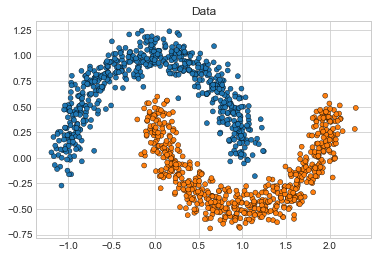

In [2]:
# #############################################################################
# Generate sample data
X, y = make_moons(noise=0.1, random_state=1, n_samples=1200)
sns.scatterplot(
    x=X[:, 0], y=X[:, 1], hue=y, marker="o", s=25, edgecolor="k", legend=False
).set_title("Data")
plt.show()

Нормалізуємо дані

In [3]:
X = StandardScaler().fit_transform(X)

In [4]:
tik = time.time()
db = DBSCAN(eps = 0.1, min_samples = 4).fit(X)
tak = time.time()
print(tak*1000 - tik*1000, "ms")

19.94677734375 ms


In [5]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 4
Estimated number of noise points: 88


In [6]:
X, y = make_moons(noise=0.1, random_state=1, n_samples=2000)
tik = time.time()
db = DBSCAN(eps = 0.1, min_samples = 4).fit(X)
tak = time.time()
print(tak*1000 - tik*1000, "ms")

14.95947265625 ms


In [7]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 14


In [8]:
X, y = make_moons(noise=0.1, random_state=1, n_samples=10000)
tik = time.time()
db = DBSCAN(eps = 0.1, min_samples = 4).fit(X)
tak = time.time()
print(tak*1000 - tik*1000, "ms")

144.64794921875 ms


In [9]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


Estimated number of clusters: 1
Estimated number of noise points: 7


Побудувала модель кластеризації на основі алгоритма DBSCAN. Розрахувала час кластеризації. Поекспериментувала з кількістю точок даних. Бачимо, що даний алгоритм достатньо чутливий до кількості об'єктів. При збільшенні точок я не змінювала значення параметрів моделі, тому отримала некоректі результати кластеризації.

Поекспериментувавши, повернемось до кількості точок даних 1200.

In [10]:
X, y = make_moons(noise=0.1, random_state=42, n_samples=1200)

In [11]:
db = DBSCAN(eps = 0.1, min_samples = 4).fit(X)

Порахуємо метрики:

In [12]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y , labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))


Estimated number of clusters: 2
Estimated number of noise points: 16
Homogeneity: 0.987
Completeness: 0.907
V-measure: 0.945


Вийшли достатньо гарні результати. Візуализуємо кластери та шумові точки.

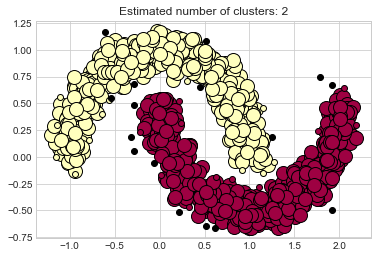

In [13]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

Побудуємо кілька альтернативни моделей, змінюючи metric та algorithm. Зо умовою metric='euclidean', algorithm='auto'.

In [14]:
tik = time.time()
db = DBSCAN(eps = 0.1, min_samples = 4, metric = 'manhattan').fit(X)
tak = time.time()
print("Час кластеризації: ", tak*1000 - tik*1000, "ms")
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)


Час кластеризації:  4.9501953125 ms


In [15]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y , labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))


Estimated number of clusters: 3
Estimated number of noise points: 37
Homogeneity: 0.969
Completeness: 0.786
V-measure: 0.868


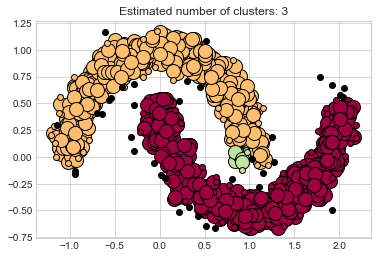

In [16]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [17]:
tik = time.time()
db = DBSCAN(eps = 0.1, min_samples = 4, metric = 'cityblock').fit(X)
tak = time.time()
print("Час кластеризації: ", tak*1000 - tik*1000, "ms")
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)


Час кластеризації:  4.98681640625 ms


In [18]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y , labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))


Estimated number of clusters: 3
Estimated number of noise points: 37
Homogeneity: 0.969
Completeness: 0.786
V-measure: 0.868


In [19]:
tik = time.time()
db = DBSCAN(eps = 0.1, min_samples = 4, metric = 'cityblock', algorithm = 'kd_tree').fit(X)
tak = time.time()
print("Час кластеризації: ", tak*1000 - tik*1000, "ms")
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y , labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))



Час кластеризації:  5.982421875 ms
Estimated number of clusters: 3
Estimated number of noise points: 37
Homogeneity: 0.969
Completeness: 0.786
V-measure: 0.868


In [20]:
tik = time.time()
db = DBSCAN(eps = 0.1, min_samples = 4, metric = 'cityblock', algorithm = 'brute').fit(X)
tak = time.time()
print("Час кластеризації: ", tak*1000 - tik*1000, "ms")
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y , labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))


Час кластеризації:  98.2861328125 ms
Estimated number of clusters: 3
Estimated number of noise points: 37
Homogeneity: 0.969
Completeness: 0.786
V-measure: 0.868


Змінивши параметри algorythm та metric, бачимо, що результат кластеризацї невірно виявляє кількість кластерів. 


Розділимо дані на вибірки і ще раз подивимочь на метрики. Бачимо, що алгоритм працює добре.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
db = DBSCAN(eps = 0.1, min_samples = 4).fit(X_train, y_train)

In [29]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y , labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))


Estimated number of clusters: 3
Estimated number of noise points: 37
Homogeneity: 0.969
Completeness: 0.786
V-measure: 0.868


In [30]:
db = DBSCAN(eps = 0.1, min_samples = 4).fit(X_test, y_test)

In [31]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y , labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))

Estimated number of clusters: 3
Estimated number of noise points: 37
Homogeneity: 0.969
Completeness: 0.786
V-measure: 0.868


# Б)

In [109]:
from sklearn.datasets import make_blobs
X1, y_true = make_blobs (n_samples =50000 ,centers=4,cluster_std =0.60 , random_state=0)
rng = np.random.RandomState(13)
X = np.dot(X1, rng.randn(2, 2))


Отримаємо графічне відображення данних. 

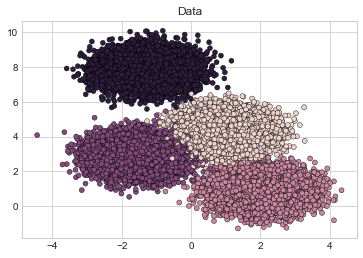

In [110]:
sns.scatterplot(x=X1[:, 0], y=X1[:, 1], hue=y_true, marker="o", s=25, edgecolor="k", legend=False).set_title("Data")
plt.show()

Нормалізуємо

In [111]:
X = StandardScaler().fit_transform(X1)

На жаль, я не змогла завантажити 900000 даних, бо мені не висачає оперативної пам'яті, тому завантажила 50000.

In [112]:
tik = time.time()
db = DBSCAN(eps = 0.12, min_samples = 37, algorithm = 'ball_tree').fit(X1,y_true)
tak = time.time()
print(tak*1000 - tik*1000, "ms")

1200.63525390625 ms


In [113]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y_true , labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y_true, labels))


Estimated number of clusters: 4
Estimated number of noise points: 4548
Homogeneity: 0.901
Completeness: 0.798
V-measure: 0.846


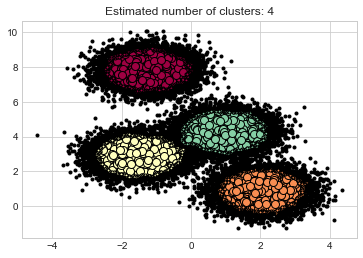

In [114]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X1[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=8,
    )

    xy = X1[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=3,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

Натренували модель, визначили час кластеризації та ефективно підібрали параметри головної моделі. Про це свідчать метрики Homogeneity, Completeness, V-measure. Поекспериментуємо з кількістю точок даних.

In [115]:
X1, y_true = make_blobs (n_samples =5000 ,centers=4,cluster_std =0.60 , random_state=0)
rng = np.random.RandomState(13)
X = np.dot(X1, rng.randn(2, 2))

In [116]:
tik = time.time()
db = DBSCAN(eps = 0.2, min_samples = 12, algorithm = 'ball_tree').fit(X1,y_true)
tak = time.time()
print(tak*1000 - tik*1000, "ms")

76.420654296875 ms


In [117]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y_true , labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y_true, labels))


Estimated number of clusters: 4
Estimated number of noise points: 420
Homogeneity: 0.906
Completeness: 0.806
V-measure: 0.853


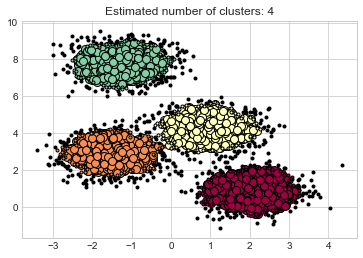

In [118]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X1[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=8,
    )

    xy = X1[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=3,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

Зменшили кількість точок, змінили параметри головної моделі. Час кластеризації набагато зменшився. Так як дані мають майже однакову плотність, алгоритму DBSCAN достатньо складно виявити кластери, він зливає їх в один. Тому треба обережно налаштовувати параметри. На великій кількості даних потрібно багато екземплярів у маленькому околі, в маленькому дата сеті можна збільшити параметр eps, та зменшити min_samples. Метод DBSCAN є достатньо швидким.


In [119]:
X_train, X_test, y_train, y_test = train_test_split(X1, y_true, test_size=0.2, random_state=42)

In [120]:
db = DBSCAN(eps = 0.2, min_samples = 12, algorithm = 'ball_tree').fit(X1,y_true)

In [121]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y_true , labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y_true, labels))


Estimated number of clusters: 4
Estimated number of noise points: 420
Homogeneity: 0.906
Completeness: 0.806
V-measure: 0.853


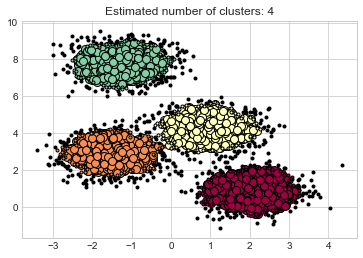

In [122]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X1[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=8,
    )

    xy = X1[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=3,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

На малому дата сеті працює значно краще, на підвибірках розбиття є стабільним, але при збільшенні точок модель стає менш точною.